In [281]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.api import VAR
import yfinance as yf
from matplotlib import dates as dt
from numpy import linalg

# Sentiment Data

In [282]:
df_sentiment = pd.read_csv("../data/sentiment_daily_data.csv")
df_sentiment.index = pd.DatetimeIndex(df_sentiment["release_date"]).to_period("D")
df_sentiment = df_sentiment.drop('release_date', axis = 1)
df_sentiment

,AAPL_daily,AAPL_diff,AMZN_daily,AMZN_diff,BAC_daily,BAC_diff,CVX_daily,CVX_diff,HD_daily,HD_diff,...,PFE_daily,PFE_diff,PG_daily,PG_diff,TSLA_daily,TSLA_diff,WMT_daily,WMT_diff,XOM_daily,XOM_diff
release_date,,,,,,,,,,,,,,,,,,,,,
2014-01-04,0.9747,-0.9876,0.9870,0.0,1.8862,0.0000,1.9993,0.0000,0.9900,0.0,...,0.9881,0.0000,0.9866,0.0,0.8641,0.0,0.9135,0.0000,0.9595,0.0000
2014-01-05,2.6382,1.6635,0.9870,0.0,0.9956,-0.8906,1.9993,0.0000,0.9900,0.0,...,0.9881,0.0000,0.9866,0.0,0.8641,0.0,0.9135,0.0000,0.9977,0.0382
2014-01-06,2.6382,0.0000,0.9870,0.0,0.9956,0.0000,1.9993,0.0000,0.9900,0.0,...,0.9881,0.0000,0.9866,0.0,0.8641,0.0,0.9135,0.0000,0.9967,-0.0010
2014-01-07,-0.2695,-2.9077,0.9870,0.0,2.9495,1.9539,1.9993,0.0000,0.9900,0.0,...,0.9881,0.0000,0.9866,0.0,0.8641,0.0,0.9135,0.0000,0.9967,0.0000
2014-01-08,-0.2695,0.0000,0.9870,0.0,0.9862,-1.9633,1.9993,0.0000,0.9900,0.0,...,0.9881,0.0000,0.9866,0.0,0.8641,0.0,0.9135,0.0000,0.9967,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-09,33.1780,0.0000,4.5365,0.0,4.1556,0.0000,1.9594,0.7939,0.9975,0.0,...,1.9891,0.0000,-0.9581,0.0,20.7979,0.0,0.3612,-0.6384,-0.9922,0.0000
2020-02-10,33.1780,0.0000,4.5365,0.0,4.1556,0.0000,1.9594,0.0000,0.9975,0.0,...,1.9891,0.0000,-0.9581,0.0,20.7979,0.0,0.3612,0.0000,-0.5306,0.4616
2020-02-11,33.1780,0.0000,4.5365,0.0,4.1556,0.0000,0.0732,-1.8862,0.9975,0.0,...,1.5383,-0.4508,-0.9581,0.0,20.7979,0.0,0.3612,0.0000,1.9926,2.5232


# Stock Data

In [283]:
df_prices = pd.read_csv("../data/stock_data_daily_pct_change.csv")
df_prices.index = pd.DatetimeIndex(df_prices["Date"]).to_period("D")
df_prices = df_prices.drop('Date', axis = 1)
df_prices = df_prices.drop("Date.1", axis = 1)

# Drop columns with little amount of data (determined in "Sentiment Analysis.ipynb")
df_prices = df_prices.drop(["LLY", "NVDA", "MA", "UNH", "V"], axis = 1)
df_prices

,AAPL,MSFT,BAC,AMZN,TSLA,XOM,JPM,KO,WMT,CVX,JNJ,HD,PG,MRK,PFE
Date,,,,,,,,,,,,,,,
2011-01-04,0.005219,0.003931,0.003524,0.004288,0.001878,0.004695,0.014473,-0.020699,0.003849,-0.003698,0.008437,-0.018125,0.002779,0.008602,0.017534
2011-01-05,0.008180,-0.003204,0.018258,0.013026,0.005999,-0.002670,0.012229,-0.005950,-0.006573,-0.001747,-0.000631,-0.003172,-0.002310,0.005777,0.006671
2011-01-06,-0.000808,0.029286,-0.004138,-0.008324,0.039135,0.006426,-0.004922,-0.007245,-0.008270,-0.008202,-0.001580,-0.004051,-0.001698,0.013676,0.003865
2011-01-07,0.007161,-0.007634,-0.013158,-0.001991,0.012912,0.005453,-0.018885,-0.001745,0.002224,0.005514,-0.009650,-0.001162,-0.002937,0.007825,0.008801
2011-01-10,0.018833,-0.013287,0.010526,-0.004367,0.007436,-0.006086,-0.005500,0.002225,-0.006472,-0.008554,-0.007029,0.000291,-0.002171,-0.004016,-0.004362
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-23,0.016319,0.000000,0.006007,0.003638,0.033605,0.005004,-0.000292,-0.001092,-0.010475,0.005431,0.002602,-0.008952,-0.003670,0.001747,0.002294
2019-12-24,0.000951,-0.000191,0.001422,-0.002114,0.014384,-0.003842,0.002770,-0.003642,0.004033,0.000083,-0.003483,0.006660,0.002562,-0.003270,-0.000763
2019-12-26,0.019840,0.008197,0.008518,0.044467,0.013380,0.001571,0.010612,0.005666,0.000084,0.002160,-0.000685,0.000680,0.000000,-0.001093,0.002291


# VAR model of merge


In [284]:
def var_model(df_sentiment: pd.DataFrame, df_prices: pd.DataFrame)-> tuple[VAR, pd.DataFrame]:
    """
    Make a VAR model for a specific stock

    Returns a tuple of the VAR model and a merged dataframe consisting of the prices and
    the sentiment.
    """
    merged_df = pd.merge(df_prices, df_sentiment, left_index= True, right_index = True)
    new_names = {df_sentiment.name: f"{df_prices.name}_sentiment", df_prices.name: f"{df_prices.name}_prices"}
    merged_df = merged_df.rename(new_names, axis=1)
    return VAR(merged_df), merged_df

In [285]:
var_models = []
merged_dfs = []
for ticker in df_prices.columns:
    var, merged_df = var_model(df_sentiment[f"{ticker}_diff"], df_prices[ticker])
    var_models.append(var)
    merged_dfs.append(merged_df)

In [286]:
results = []
for model in var_models:
    result = model.fit(maxlags=35, ic='aic')
    results.append(result)
    print(result.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 16, Dec, 2022
Time:                     18:55:42
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -3.27623
Nobs:                     1492.00    HQIC:                  -3.39675
Log likelihood:          -1592.73    FPE:                  0.0311691
AIC:                     -3.46833    Det(Omega_mle):       0.0300709
--------------------------------------------------------------------
Results for equation AAPL_prices
                        coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------------
const                      0.001052         0.000412            2.556           0.011
L1.AAPL_prices             0.018722         0.026095            0.717           0.473
L1.AAPL_sentiment         -0.00001

# Testing asssumptions

### Assumption 1
The mean of the residuals should be approximately zero:

In [287]:
for result in results:
    sentiment = result.names[0]
    price = result.names[1]
    print(f"{sentiment} resid. mean = ",result.resid[sentiment].mean())
    print(f"{price} resid. mean = ", result.resid[price].mean())

AAPL_prices resid. mean =  -3.7205865436499885e-20
AAPL_sentiment resid. mean =  -1.2191617986232282e-15
MSFT_prices resid. mean =  -7.083357108085284e-19
MSFT_sentiment resid. mean =  -6.012651759957866e-16
BAC_prices resid. mean =  -1.1109636670698698e-18
BAC_sentiment resid. mean =  -2.3700558230823888e-17
AMZN_prices resid. mean =  3.154042683594195e-19
AMZN_sentiment resid. mean =  -7.409402859530457e-16
TSLA_prices resid. mean =  -7.396555793638618e-19
TSLA_sentiment resid. mean =  -1.8935182831714862e-17
XOM_prices resid. mean =  9.899488636240979e-19
XOM_sentiment resid. mean =  1.5631940186722203e-16
JPM_prices resid. mean =  2.0340528432506198e-19
JPM_sentiment resid. mean =  9.467591415857431e-18
KO_prices resid. mean =  -8.157951416751317e-19
KO_sentiment resid. mean =  -3.9158166800406325e-17
WMT_prices resid. mean =  1.3322676295501879e-18
WMT_sentiment resid. mean =  9.592326932761352e-17
CVX_prices resid. mean =  -8.91148916087082e-19
CVX_sentiment resid. mean =  -7.604

### Assumption 2

Covariance matrix of the errors should be positive semi definite:

In [288]:
for result in results:
    cov_matrix = result.resid_corr
    print(linalg.eigvals(cov_matrix))

[1.04662188 0.95337812]
[1.00788712 0.99211288]
[0.92905974 1.07094026]
[0.94624465 1.05375535]
[1.03531543 0.96468457]
[0.95911783 1.04088217]
[1.00378321 0.99621679]
[0.98846532 1.01153468]
[1.09339304 0.90660696]
[0.98085952 1.01914048]
[1.03034024 0.96965976]
[1.07884307 0.92115693]
[1.03233171 0.96766829]
[1.00850229 0.99149771]
[1.06631872 0.93368128]


### Assumption 3

Residuals should be uncorrelated:

In [289]:
for result in results:
    print(f"{result.names[0]} and {result.names[1]}:")
    print(result.test_whiteness(result.k_ar+1).summary(), "\n \n")

AAPL_prices and AAPL_sentiment:
Portmanteau-test for residual autocorrelation. H_0: residual autocorrelation up to lag 14 is zero. Conclusion: fail to reject H_0 at 5% significance level.
Test statistic Critical value p-value df
----------------------------------------
         2.813          9.488   0.590  4
---------------------------------------- 
 

MSFT_prices and MSFT_sentiment:
Portmanteau-test for residual autocorrelation. H_0: residual autocorrelation up to lag 17 is zero. Conclusion: fail to reject H_0 at 5% significance level.
Test statistic Critical value p-value df
----------------------------------------
         9.042          9.488   0.060  4
---------------------------------------- 
 

BAC_prices and BAC_sentiment:
Portmanteau-test for residual autocorrelation. H_0: residual autocorrelation up to lag 7 is zero. Conclusion: fail to reject H_0 at 5% significance level.
Test statistic Critical value p-value df
----------------------------------------
         2.642       

### Assumption 4

Data should be normally distributed:

In [290]:
for result in results:
    print(result.test_whiteness(result.k_ar+1).summary())
    # print(str(result.test_normality()))

Portmanteau-test for residual autocorrelation. H_0: residual autocorrelation up to lag 14 is zero. Conclusion: fail to reject H_0 at 5% significance level.
Test statistic Critical value p-value df
----------------------------------------
         2.813          9.488   0.590  4
----------------------------------------
Portmanteau-test for residual autocorrelation. H_0: residual autocorrelation up to lag 17 is zero. Conclusion: fail to reject H_0 at 5% significance level.
Test statistic Critical value p-value df
----------------------------------------
         9.042          9.488   0.060  4
----------------------------------------
Portmanteau-test for residual autocorrelation. H_0: residual autocorrelation up to lag 7 is zero. Conclusion: fail to reject H_0 at 5% significance level.
Test statistic Critical value p-value df
----------------------------------------
         2.642          9.488   0.619  4
----------------------------------------
Portmanteau-test for residual autocorrela

Visualizing results in a Matrix:



In [291]:
def normallity_of_residuals(result) -> bool:
    '''This function tests the normality of residuals, given these residuals and returns the p value. Test using significance of alpha = 0.05'''
    p_value = pd.DataFrame(result.test_normality().summary().data).iloc[1,2]
    if p_value < 0.05:
            significant_p = True
    else:
            significant_p = False
    return significant_p

In [292]:
def autocorrelation_of_residuals(result) -> bool:
    '''This function tests the autocOrrelation of residuals, given these residuals and returns the p vavlues'''
    p_value = pd.DataFrame(result.test_whiteness(result.k_ar+1).summary().data).iloc[1,2]
    if p_value < 0.05:
            significant_p = True
    else:
            significant_p = False
    return significant_p

In [293]:
def check_mean_of_residuals(result) -> tuple:
      '''checking if residuals of a VAR results containing the residuals of 2 respective timeseries have mean 0 and returns a tuple containing boolean values
       #  ref: https://en.wikipedia.org/wiki/Vector_autoregression '''
      sentiment = result.names[0]
      price = result.names[1]
      if result.resid[sentiment].mean() < 0.001:
            sentiment_timeseries_residual_mean_of_0 = True
      if result.resid[price].mean() < 0.001:
            price_timeseries_residual_mean_of_0 = True
      if sentiment_timeseries_residual_mean_of_0 and price_timeseries_residual_mean_of_0:
            return True
      else:
            return False


In [294]:
def matrix_is_postivive_and_semidefinite(matrix) -> bool:
    """ checking if covariance matrix is positive and semi-definite. This can be checked by checking of the matrix is symetric and eigenvalues are positive. 
    ref: https://en.wikipedia.org/wiki/Definite_matrix"""
    cov_matrix = result.resid_corr
    cov_matrix = result.resid_corr
    is_symmetric = cov_matrix.shape[0] == cov_matrix.shape[1]
    eigen_values = linalg.eigvals(cov_matrix)
    eigen_values_positive = eigen_values[0]> 0 and eigen_values[1] > 0 
    if is_symmetric and eigen_values_positive:
        covariance_matrix_positive_and_semi_definite = True
    else:
        covariance_matrix_positive_and_semi_definite = False
    return covariance_matrix_positive_and_semi_definite

In [295]:
def Assumption_matrix(List_of_results: list) -> pd.DataFrame:
    '''Creates a dataframe of assumption test results per stock, where true is the value if the assumption passes and False when it does not'''
    dict_of_assumption_test_results_per_stock = {}
    for result in results:
        stock_name = result.names[0]
        dict_of_assumption_test_results = {str(stock_name):{'Mean of residuals = 0':check_mean_of_residuals(result), 'Autocorrelation of residuals = 0': autocorrelation_of_residuals(result), 'Covariance Matrix positive and semidefinite':matrix_is_postivive_and_semidefinite(result), 'normality of residuals':normallity_of_residuals(result)}}
        dict_of_assumption_test_results_per_stock.update(dict_of_assumption_test_results)
    df_of_assumption_test_results = pd.DataFrame(dict_of_assumption_test_results_per_stock)
    return df_of_assumption_test_results

In [296]:
Assumption_matrix(results).head()

,AAPL_prices,MSFT_prices,BAC_prices,AMZN_prices,TSLA_prices,XOM_prices,JPM_prices,KO_prices,WMT_prices,CVX_prices,JNJ_prices,HD_prices,PG_prices,MRK_prices,PFE_prices
Mean of residuals = 0,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
Autocorrelation of residuals = 0,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
Covariance Matrix positive and semidefinite,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
normality of residuals,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


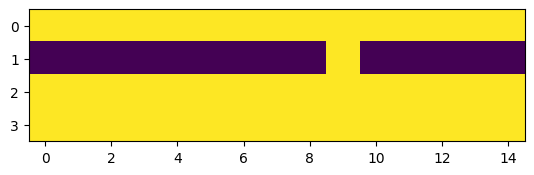

In [297]:
# need to fix colors, right now yellow means assumption passed, while purple means it does not
# assumption tests are the row index while  stock are columns
plt.imshow(Assumption_matrix(results))
plt.show()

# Forecasting

In [298]:
def forecast(results, merged_df):

    # get ticker name by removing "_prices"
    ticker = results.names[0][:-7]

    # last date in train set: 2019-12-30
    # downloading testset
    test_prices = pd.DataFrame(yf.Ticker(ticker).history(start = '2019-12-30', end = '2020-1-20')['Close'])
    forecast_df = pd.DataFrame(results.forecast(np.array(merged_df), 14))
    forecast_df.columns = ['price', 'sentiment']

    # recall AAPL stock prive is percent change, and APPL setiment is differences
    # undoing the differencing of APPL_sentiment by taking the cumsum
    initial_value = test_prices.iloc[0,:]
    forecast_df["sentiment"].cumsum(axis = 0)
    forecasted_prices = forecast_df.assign(price=forecast_df.price.pct_change(-1)+initial_value[0])
    forecasted_prices['price'].index = test_prices.index

    return forecasted_prices["price"], test_prices

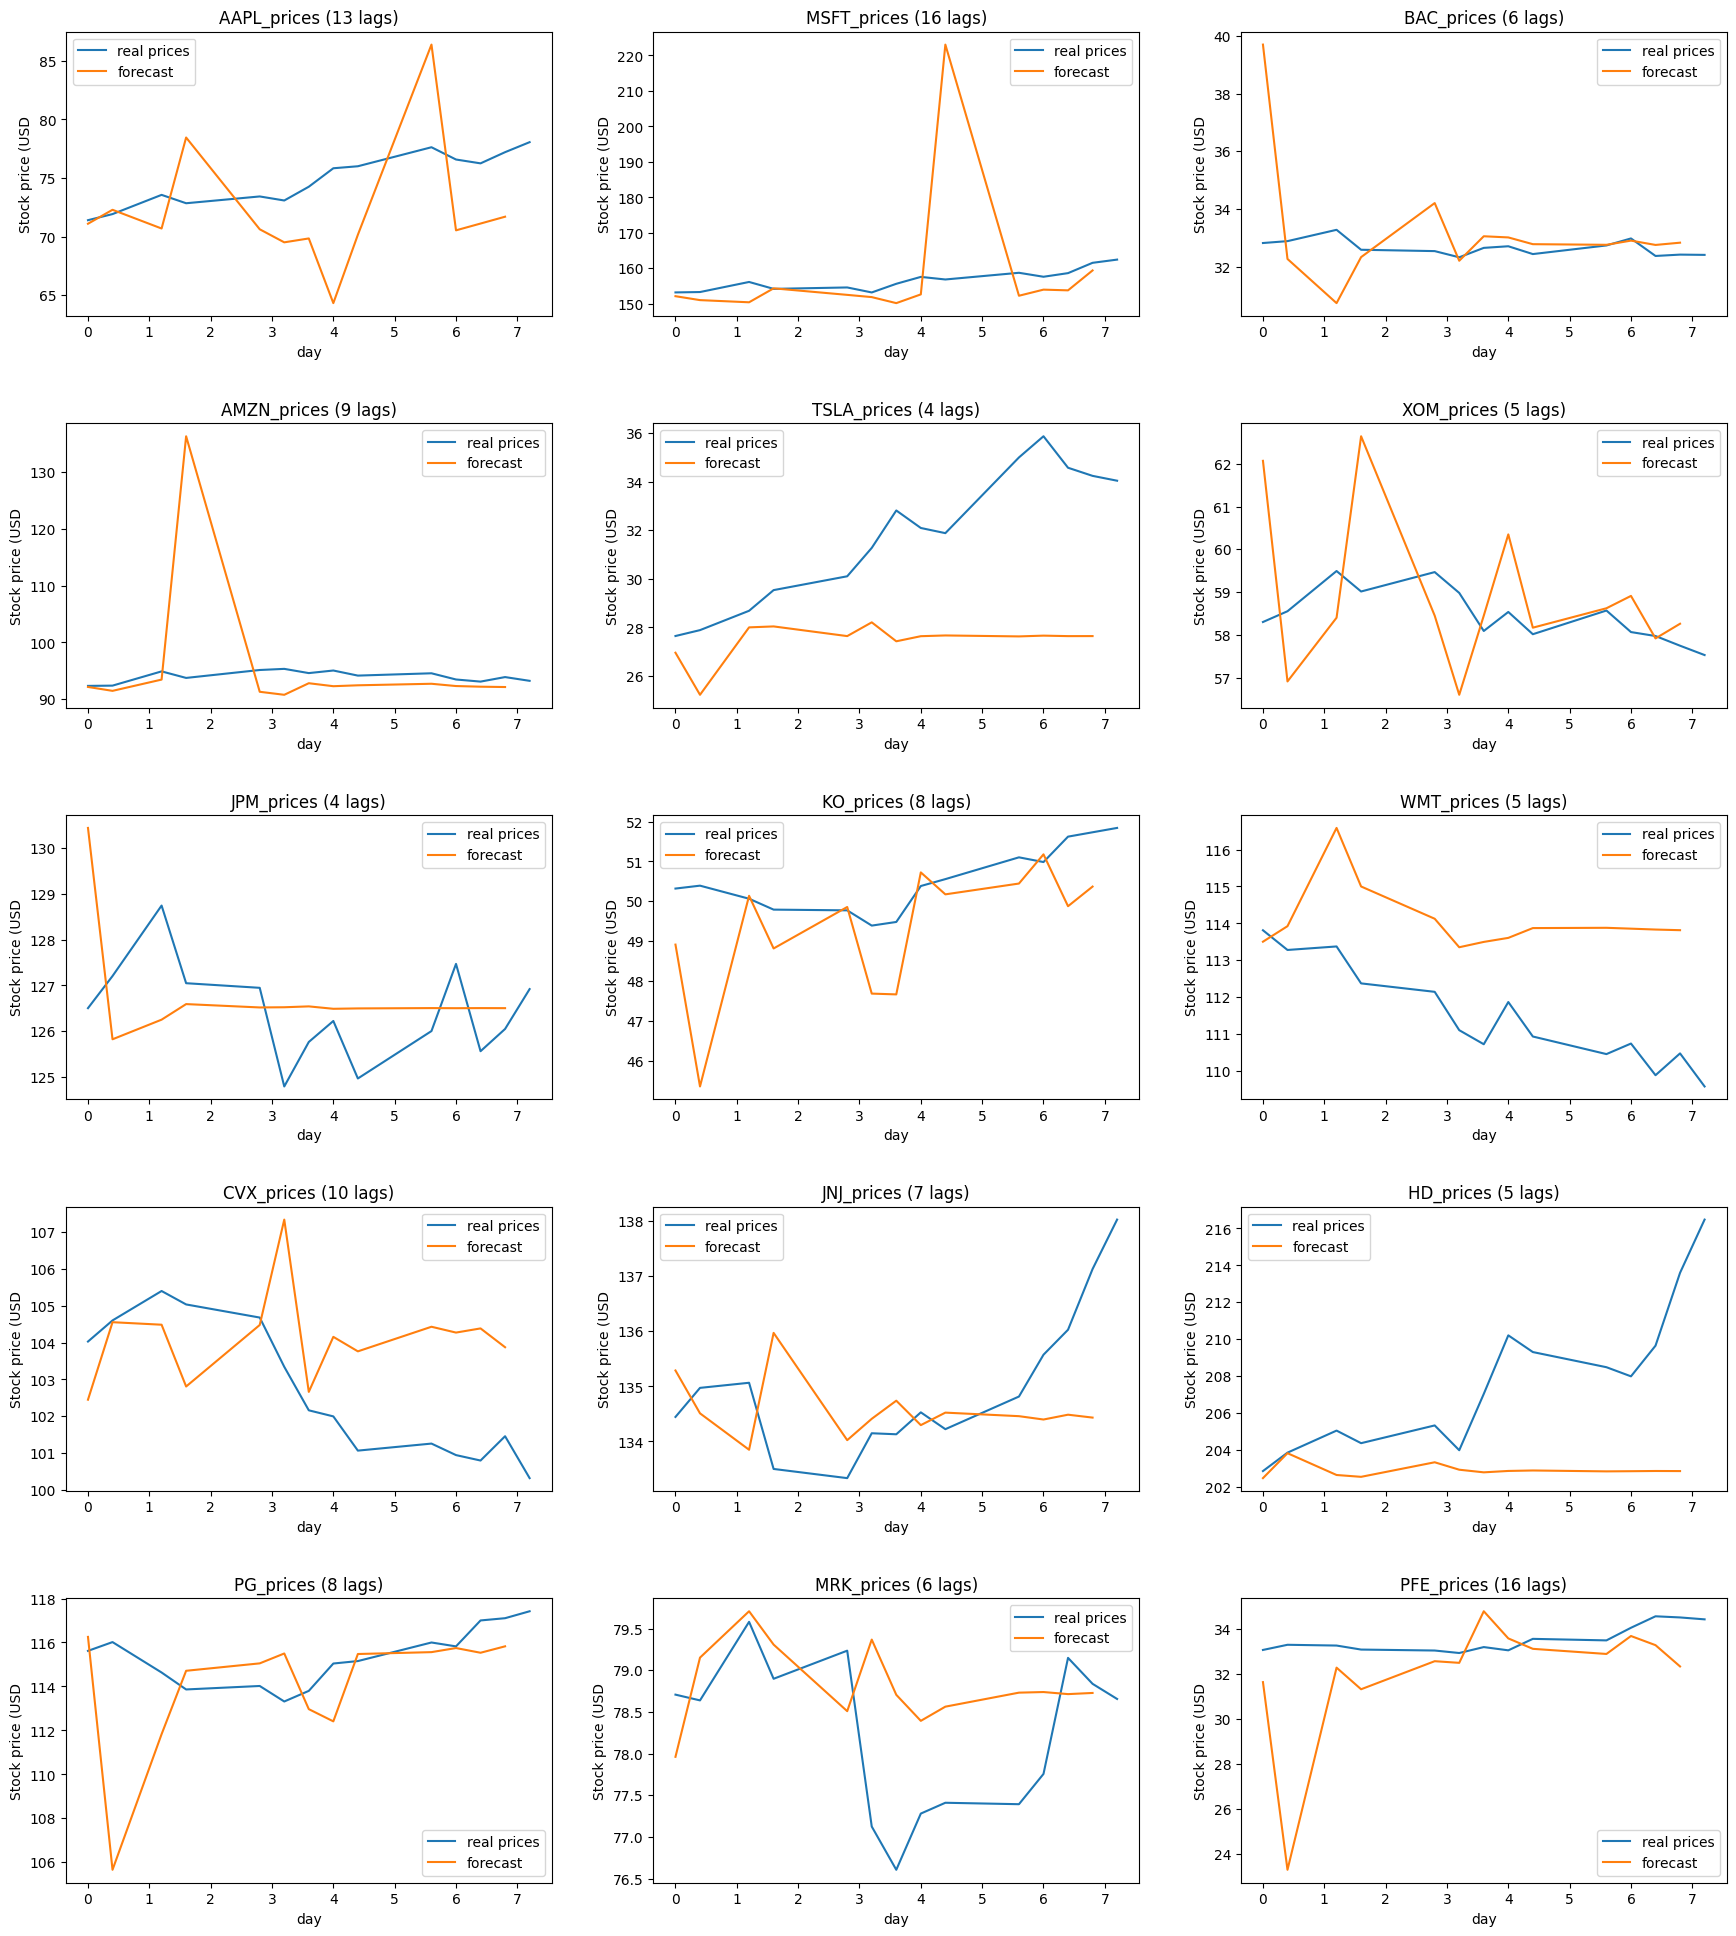

In [299]:
fig = plt.figure(figsize = (18, 20))
i = 0
for result, merged_df in zip(results, merged_dfs):
    i+=1
    forecasted, real_prices = forecast(result, merged_df)
    plt.subplot(5, 3, i)
    plt.title(f"{result.names[0]} ({result.k_ar} lags)" )
    plt.xlabel('day')
    plt.ylabel('Stock price (USD')
    days = dt.date2num(real_prices.index)
    days = [(t-days[0])/2.5 for t in days]
    plt.plot(days, real_prices["Close"], label='real prices')
    plt.plot(days, forecasted, label='forecast')
    plt.legend()
fig.tight_layout(pad = 3)
plt.show()

In [300]:
lags = [result.k_ar for result in results]
np.mean(lags)

8.133333333333333

# Using sliding windows for forecast

In [301]:
def sliding_windows(df, window_size) -> list:
    # Create sliding windows of timeseries for each variable in the dataframe
    # create sliding windows of timeseries per stock:
    list_of_windows_per_variable = []
    for variable in df.columns:
        variable_timeseries = df[str(variable)]
        # Define the window size

        # Initialize the list of windows
        windows = []

        # Iterate over the time series
        for i in np.arange(len(variable_timeseries.index) - window_size + 1, step = window_size):
            # Take the last `window_size` elements of the time series
            # windows are non overlapping, i.e. the first window is from index 0-20, the next from 20-40 etc. 
            # instead of first window being index 0-20, second window being 1-21, etc.
            current_window = variable_timeseries[i : i+window_size]
            window_index = variable_timeseries.index[i : i+window_size]
            # Add the current window to the list of windows
            windows.append(pd.DataFrame(current_window, index = window_index))
        list_of_windows_per_variable.append(windows)
    return list_of_windows_per_variable

In [302]:
# Sliding windows for AAPL
windows = sliding_windows(merged_dfs[6], window_size = 80)
windows_prices = windows[0]
windows_sentiment = windows[1]


In [303]:
def VAR_model_windows(windows):
    """Return a tuple containing a list of the VAR models of all windows and a list of
    merged prices/sentiment dataframes."""

    merged_windows = []
    VAR_models = []
    for window_prices, window_sentiments in zip(windows[0], windows[1]):
        merged_window = pd.merge(window_prices, window_sentiments, left_index= True, right_index = True)
        merged_windows.append(merged_window)
        VAR_models.append(VAR(merged_window))

    return VAR_models, merged_windows

In [304]:
var_models_windows, merged_windows = VAR_model_windows(windows)

window_results = []
for model in var_models_windows:
    result = model.fit(14)
    window_results.append(result)
    print(result.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 16, Dec, 2022
Time:                     18:55:55
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -6.99100
Nobs:                     66.0000    HQIC:                  -8.15489
Log likelihood:           164.903    FPE:                0.000152720
AIC:                     -8.91525    Det(Omega_mle):     7.37118e-05
--------------------------------------------------------------------
Results for equation JPM_prices
                       coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------------
const                    -0.000056         0.001678           -0.033           0.973
L1.JPM_prices             0.304583         0.161137            1.890           0.059
L1.JPM_sentiment          0.001256     

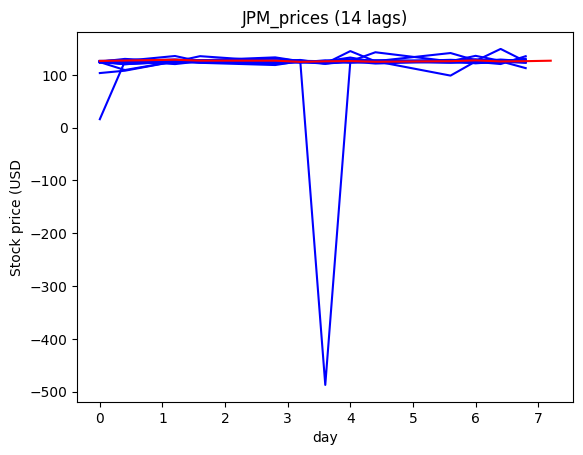

In [305]:

forecasted_prices = []
for result, merged_df in zip(window_results, merged_windows):
    forecasted, real_prices = forecast(result, merged_df)
    forecasted_prices.append(forecasted)
    days = dt.date2num(real_prices.index)
    days = [(t-days[0])/2.5 for t in days]
    plt.plot(days, forecasted, label='forecast', color="blue")

plt.plot(days, real_prices["Close"], label='real prices', color = "red")
plt.title(f"{result.names[0]} ({result.k_ar} lags)" )
plt.xlabel('day')
plt.ylabel('Stock price (USD')
plt.show()

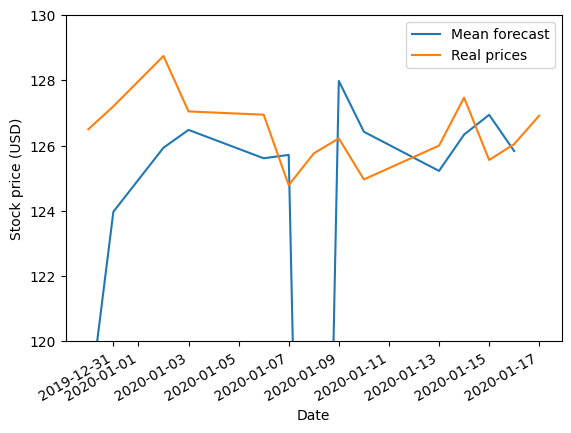

In [306]:
df = pd.concat(forecasted_prices, axis=1).agg(['mean','std'], axis=1)
df["mean"].plot(label = "Mean forecast")
real_prices["Close"].plot(label = "Real prices")
plt.legend()
plt.ylabel("Stock price (USD)")
plt.xlabel("Date")
plt.ylim(120, 130)
plt.show()